In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib
import plotly.express as px
from datetime import date, time, datetime, timedelta

In [3]:
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [4]:
df1 = pd.read_csv("../dataCollection/fromPomber/csvData.csv")
print(df1.head())

        date  confirmed  deaths  recovered
0  2020-1-22          0       0          0
1  2020-1-23          0       0          0
2  2020-1-24          0       0          0
3  2020-1-25          0       0          0
4  2020-1-26          0       0          0


In [5]:
df1['date'] = pd.to_datetime(df1['date'])
df1.set_index('date', inplace=True)
df1.index
print(df1.dtypes)

confirmed    int64
deaths       int64
recovered    int64
dtype: object


In [6]:
df1 = df1.diff()
df1.loc['2020-01-22', 'confirmed'] = 0.0
df1['confirmed'] = df1['confirmed'].astype(np.int64)
print(df1.head(15))
df1.dtypes

            confirmed  deaths  recovered
date                                    
2020-01-22          0     NaN        NaN
2020-01-23          0     0.0        0.0
2020-01-24          0     0.0        0.0
2020-01-25          0     0.0        0.0
2020-01-26          0     0.0        0.0
2020-01-27          0     0.0        0.0
2020-01-28          0     0.0        0.0
2020-01-29          0     0.0        0.0
2020-01-30          1     0.0        0.0
2020-01-31          0     0.0        0.0
2020-02-01          0     0.0        0.0
2020-02-02          1     0.0        0.0
2020-02-03          1     0.0        0.0
2020-02-04          0     0.0        0.0
2020-02-05          0     0.0        0.0


confirmed      int64
deaths       float64
recovered    float64
dtype: object

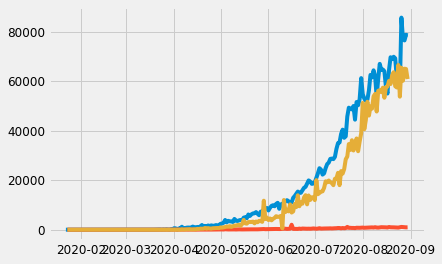

In [7]:
plt.plot(df1)
plt.show()

In [8]:
print ('Mean: ',np.mean(df1['confirmed']))
print ('Standard Deviation: ',np.std(df1['confirmed']))
print ('Maximum Temperature: ',np.max(df1['confirmed']))
print ('Minimum Temperature: ',np.min(df1['confirmed']))

Mean:  16311.914414414414
Standard Deviation:  22964.597243490647
Maximum Temperature:  85687
Minimum Temperature:  0


In [9]:
df1['active'] = df1['confirmed']- df1['recovered']- df1['deaths']

In [10]:
print(df1.head())
df2 = df1.groupby('date')['recovered', 'deaths', 'confirmed', 'active'].sum().reset_index()
print(df2)

            confirmed  deaths  recovered  active
date                                            
2020-01-22          0     NaN        NaN     NaN
2020-01-23          0     0.0        0.0     0.0
2020-01-24          0     0.0        0.0     0.0
2020-01-25          0     0.0        0.0     0.0
2020-01-26          0     0.0        0.0     0.0
          date  recovered  deaths  confirmed   active
0   2020-01-22        0.0     0.0          0      0.0
1   2020-01-23        0.0     0.0          0      0.0
2   2020-01-24        0.0     0.0          0      0.0
3   2020-01-25        0.0     0.0          0      0.0
4   2020-01-26        0.0     0.0          0      0.0
..         ...        ...     ...        ...      ...
217 2020-08-26    65432.0  1115.0      85687  19140.0
218 2020-08-27    60177.0  1057.0      77266  16032.0
219 2020-08-28    65050.0  1021.0      76472  10401.0
220 2020-08-29    64935.0   948.0      78761  12878.0
221 2020-08-30    60868.0   971.0      78512  16673.0

[222 row

In [11]:
recent_date = df1.index.max()
earliest_date = df1.index.min()
print(recent_date)
print(earliest_date)

2020-08-30 00:00:00
2020-01-22 00:00:00


In [12]:
print(df2)
actual_cases = []

          date  recovered  deaths  confirmed   active
0   2020-01-22        0.0     0.0          0      0.0
1   2020-01-23        0.0     0.0          0      0.0
2   2020-01-24        0.0     0.0          0      0.0
3   2020-01-25        0.0     0.0          0      0.0
4   2020-01-26        0.0     0.0          0      0.0
..         ...        ...     ...        ...      ...
217 2020-08-26    65432.0  1115.0      85687  19140.0
218 2020-08-27    60177.0  1057.0      77266  16032.0
219 2020-08-28    65050.0  1021.0      76472  10401.0
220 2020-08-29    64935.0   948.0      78761  12878.0
221 2020-08-30    60868.0   971.0      78512  16673.0

[222 rows x 5 columns]


In [13]:
n = 5
df2 = df2.drop(df2.tail(n).index)

In [14]:
print(df2)

          date  recovered  deaths  confirmed   active
0   2020-01-22        0.0     0.0          0      0.0
1   2020-01-23        0.0     0.0          0      0.0
2   2020-01-24        0.0     0.0          0      0.0
3   2020-01-25        0.0     0.0          0      0.0
4   2020-01-26        0.0     0.0          0      0.0
..         ...        ...     ...        ...      ...
212 2020-08-21    63631.0   945.0      69876   5300.0
213 2020-08-22    57989.0   912.0      69239  10338.0
214 2020-08-23    57469.0   836.0      61408   3103.0
215 2020-08-24    66550.0   848.0      60975  -6423.0
216 2020-08-25    53754.0   967.0      57224   2503.0

[217 rows x 5 columns]


In [15]:
confirmed_cases_india = np.array(df2['confirmed']).reshape(-1, 1)

In [16]:
dates = df2.date.unique()
print(len(dates))
days_index = np.array([i for i in range(len(dates))]).reshape(-1, 1)
last_5_actual_cases = np.round(df2['confirmed'])
print(last_5_actual_cases[-5:])

217
212    69876
213    69239
214    61408
215    60975
216    57224
Name: confirmed, dtype: int64


In [17]:
from sklearn.model_selection import train_test_split
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_index, confirmed_cases_india, test_size=0.42, shuffle=False)

In [18]:
#growth visualization for different algorithms
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y)
    plt.plot(future_forcast, pred, linestyle='dashed', color=color)
    plt.title('# of Coronavirus Cases Over Time', size=30)
    plt.xlabel('Days Since ' + earliest_date.strftime('%Y-%m-%d') , size=30)
    plt.ylabel('# of Cases', size=30)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

In [19]:
future_forcast = np.array([i for i in range(len(dates)+ 10)]).reshape(-1, 1)
future_forcast_dates = []
for i in range(len(dates)+10):
    future_forcast_dates.append((earliest_date + timedelta(days=i)).strftime('%Y-%m-%d'))

In [20]:
from sklearn.svm import SVR

svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=4, C=0.2)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed.ravel())
svm_pred = svm_confirmed.predict(future_forcast)

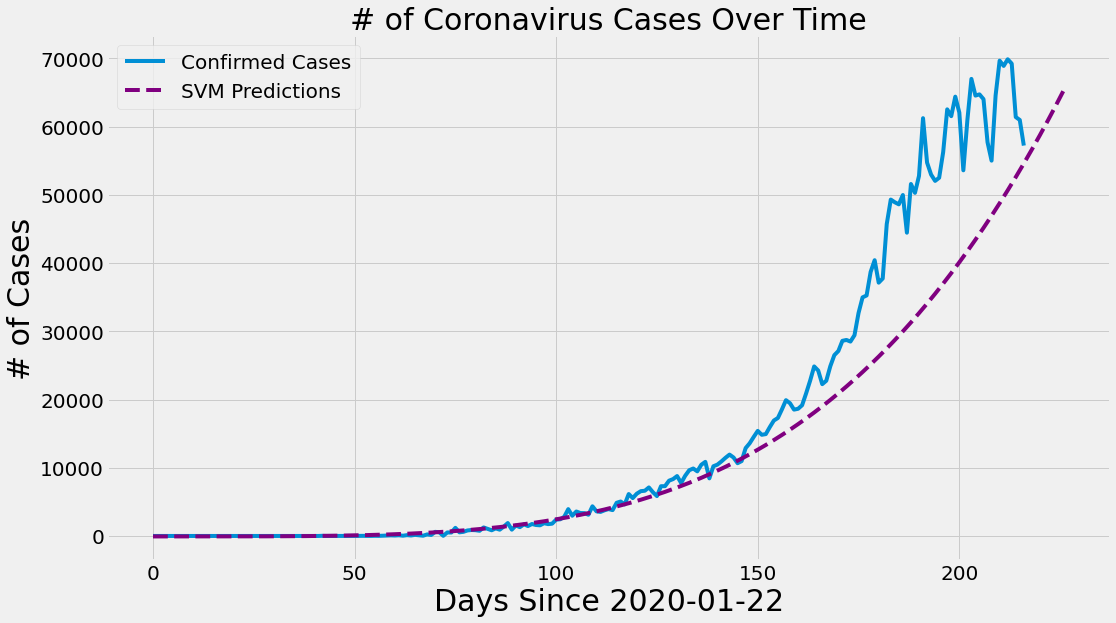

In [21]:
plot_predictions(days_index, confirmed_cases_india, svm_pred, 'SVM Predictions', 'purple')

In [22]:
svm_df = pd.DataFrame({'date': future_forcast_dates[-10:], 'SVM Predicted # of Confirmed Cases': np.round(svm_pred[-10:])})
print(svm_df)

         date  SVM Predicted # of Confirmed Cases
0  2020-08-26                             55622.0
1  2020-08-27                             56656.0
2  2020-08-28                             57704.0
3  2020-08-29                             58766.0
4  2020-08-30                             59843.0
5  2020-08-31                             60935.0
6  2020-09-01                             62042.0
7  2020-09-02                             63163.0
8  2020-09-03                             64300.0
9  2020-09-04                             65452.0


In [23]:
last_5_predictions = np.round(svm_pred[-10:-5])
print(last_5_predictions)

[55622. 56656. 57704. 58766. 59843.]


In [24]:
from sklearn.metrics import mean_squared_error
svm_error = mean_squared_error(last_5_actual_cases[-5:], last_5_predictions)
print(svm_error)

77393372.6


In [25]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100


In [27]:
svm_p_error = mean_absolute_percentage_error(last_5_actual_cases[-20:-5], np.round(svm_pred[-20:-5]))
svm_p_error

16.049858871319632

         date  Linear Regression Predicted # of Confirmed Cases Worldwide
0  2020-08-26                                            26298.0         
1  2020-08-27                                            26596.0         
2  2020-08-28                                            26896.0         
3  2020-08-29                                            27198.0         
4  2020-08-30                                            27502.0         
5  2020-08-31                                            27807.0         
6  2020-09-01                                            28114.0         
7  2020-09-02                                            28422.0         
8  2020-09-03                                            28732.0         
9  2020-09-04                                            29044.0         


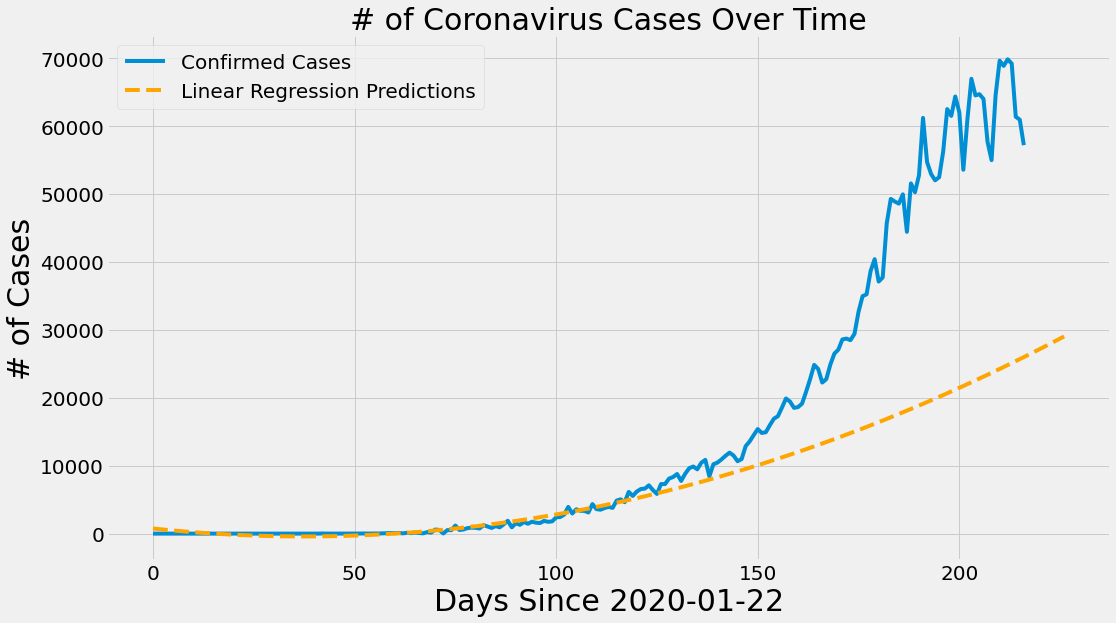

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed.ravel())
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)

lr_df = pd.DataFrame({'date': future_forcast_dates[-10:], 'Linear Regression Predicted # of Confirmed Cases Worldwide': np.round(linear_pred[-10:])})
print(lr_df)

plot_predictions(days_index, confirmed_cases_india, linear_pred, 'Linear Regression Predictions', 'orange')

In [29]:
last_5_predictions = np.round(linear_pred[-10:-5])
lr_error = mean_squared_error(last_5_actual_cases[-5:], last_5_predictions)
print(lr_error)

1386565738.0


In [30]:
print('\nMean absolute percentage error: %f'%mean_absolute_percentage_error(last_5_actual_cases[-20:-5], linear_pred[-20:-5]))

lr_p_error = mean_absolute_percentage_error(last_5_actual_cases[-20:-5], linear_pred[-20:-5])


Mean absolute percentage error: 59.305318


         date  MLP Predicted # of Confirmed Cases
0  2020-08-26                             25945.0
1  2020-08-27                             26152.0
2  2020-08-28                             26359.0
3  2020-08-29                             26565.0
4  2020-08-30                             26772.0
5  2020-08-31                             26979.0
6  2020-09-01                             27186.0
7  2020-09-02                             27392.0
8  2020-09-03                             27599.0
9  2020-09-04                             27806.0


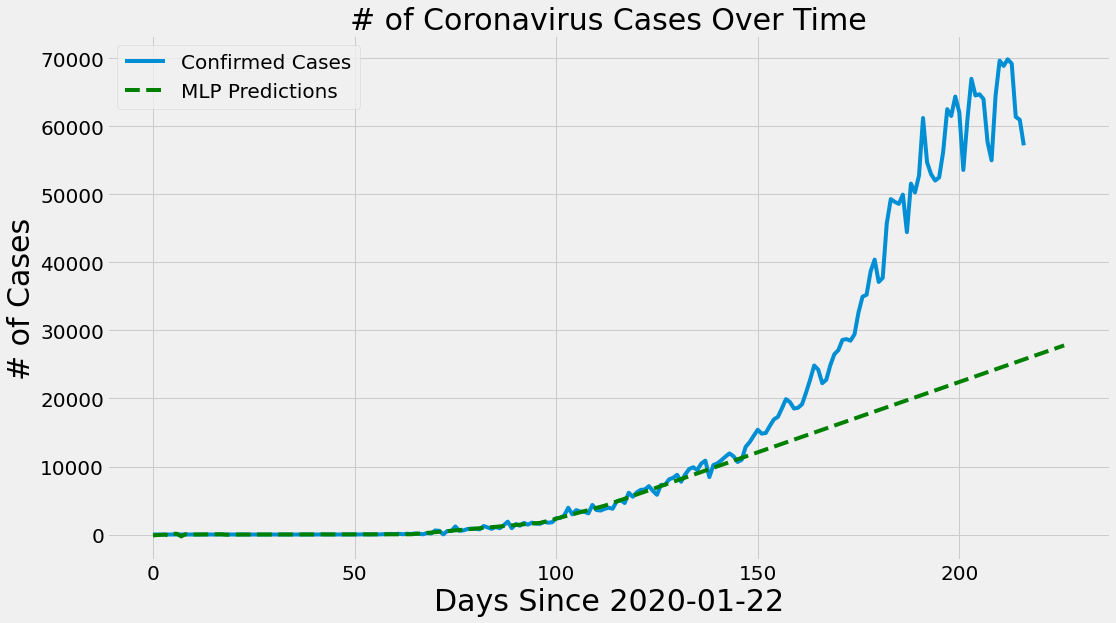

In [31]:
from sklearn.neural_network import MLPRegressor

mlp_confirmed = MLPRegressor(solver='lbfgs', max_iter=500)
mlp_confirmed.fit(X_train_confirmed, y_train_confirmed.ravel())
mlp_pred = mlp_confirmed.predict(future_forcast)

mlp_df = pd.DataFrame({'date': future_forcast_dates[-10:], 'MLP Predicted # of Confirmed Cases': np.round(mlp_pred[-10:])})
print(mlp_df)

plot_predictions(days_index, confirmed_cases_india, mlp_pred, 'MLP Predictions', 'green')

In [32]:
last_5_predictions = np.round(mlp_pred[-10:-5])
mlp_error = mean_squared_error(last_5_actual_cases[-5:], last_5_predictions)
print(mlp_error)

1425245427.0


In [33]:
print('\nMean absolute percentage error: %f'%mean_absolute_percentage_error(last_5_actual_cases[-20:-5], mlp_pred[-20:-5]))
mlp_p_error = mean_absolute_percentage_error(last_5_actual_cases[-20:-5], mlp_pred[-20:-5])


Mean absolute percentage error: 59.458979


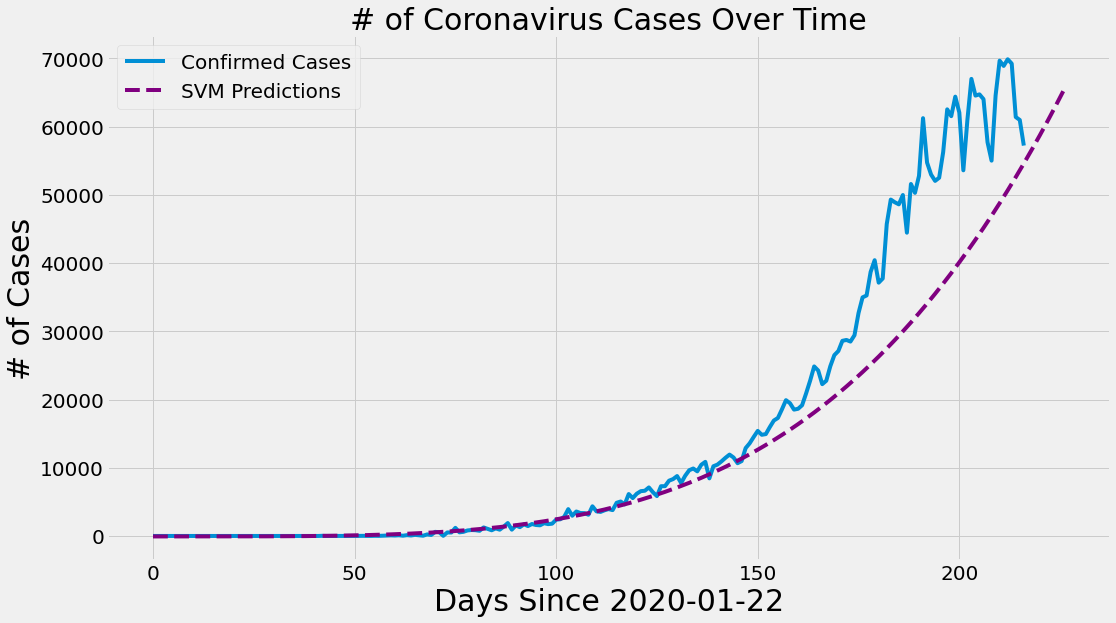

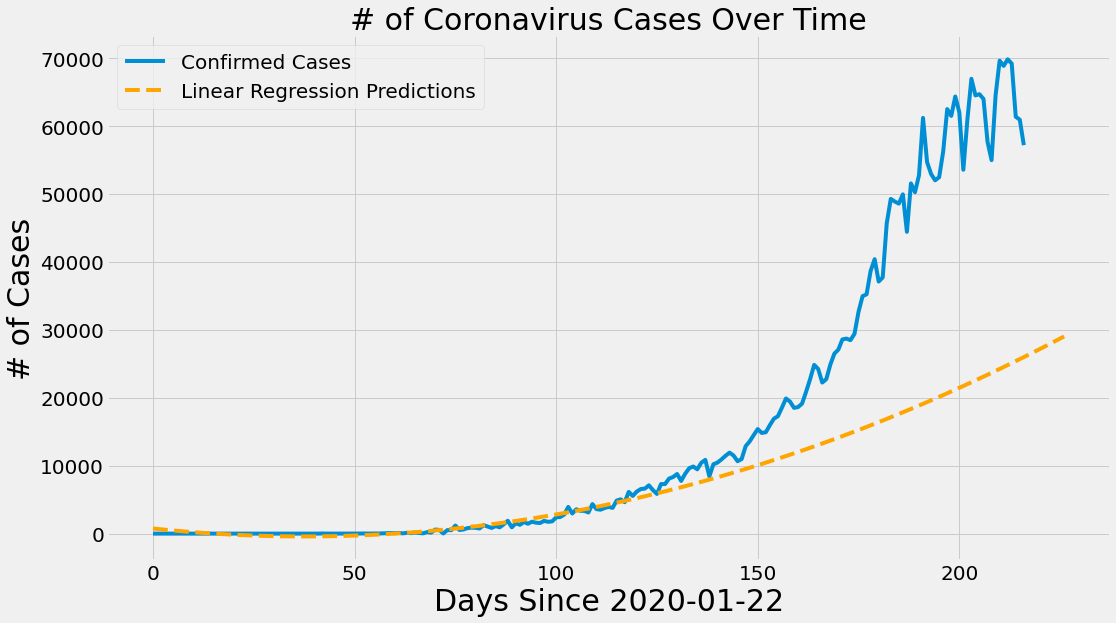

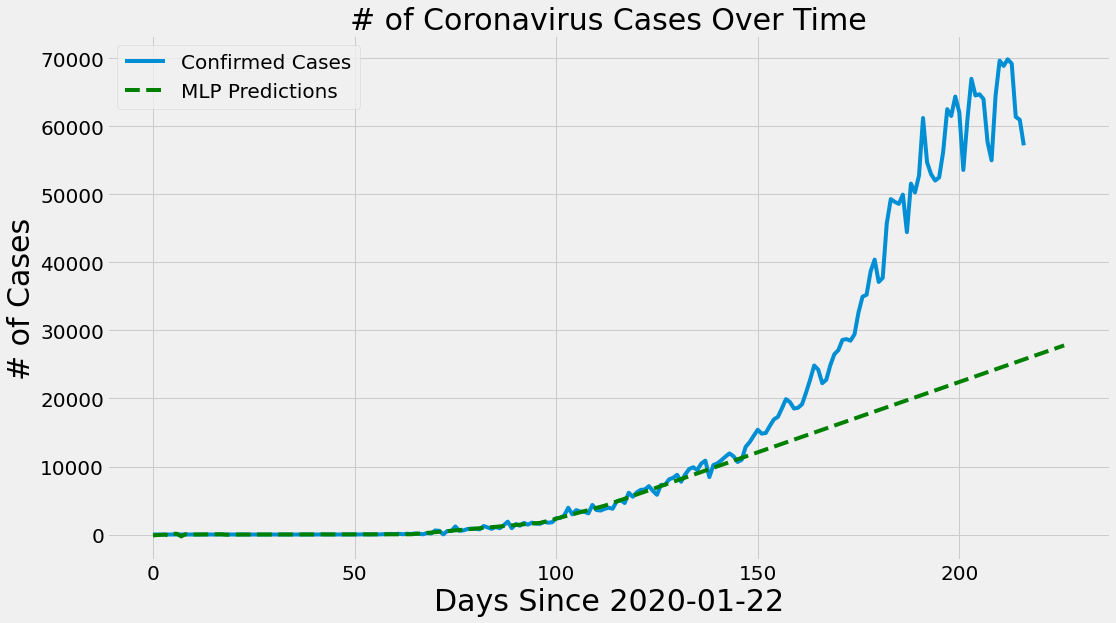

In [34]:
plot_predictions(days_index, confirmed_cases_india, svm_pred, 'SVM Predictions', 'purple')
plot_predictions(days_index, confirmed_cases_india, linear_pred, 'Linear Regression Predictions', 'orange')
plot_predictions(days_index, confirmed_cases_india, mlp_pred, 'MLP Predictions', 'green')

In [35]:
print("Error using SVM  "+ str(svm_error))
print("Error using MLP  "+ str(mlp_error))
print("Error using Linear Regression  "+ str(lr_error))

Error using SVM  77393372.6
Error using MLP  1425245427.0
Error using Linear Regression  1386565738.0


In [36]:
print("Mean absolute percentage Error using SVM  "+ str(svm_p_error))
print("Mean absolute percentage Error using MLP  "+ str(mlp_p_error))
print("Mean absolute percentage Error using Linear Regression  "+ str(lr_p_error))

Mean absolute percentage Error using SVM  16.049858871319632
Mean absolute percentage Error using MLP  59.458978574557364
Mean absolute percentage Error using Linear Regression  59.305318022824785
